<a href="https://colab.research.google.com/github/jofrajodi/biophysics/blob/master/Activity_of_Heat_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Newton's Law of Cooling and One-Dimensional Heat Equation**

**Prepared by:**

José A. Álvarez B.  
Professor of Physical Chemistry  
Biomedical Engineering Program  
Faculty of Nutrition and Food Sciences  
CES University

Email: jaalvarez@ces.edu.co

---

# **Introduction**

---

Heat transfer is a fundamental concept in both physics and engineering, with broad applications in various fields such as thermodynamics, materials science, and biological systems. Understanding how heat moves through different media is essential for designing efficient thermal systems, predicting material behavior under temperature changes, and even understanding physiological processes in living organisms.

In this project, we focus on two critical aspects of heat transfer:

1. **Newton's Law of Cooling:** This law is particularly important in scenarios where an object exchanges heat with its surroundings, such as in the cooling of electronic devices, climate control in buildings, and medical applications where body temperature regulation is crucial. By modeling the rate of temperature change as proportional to the difference between the object's temperature and the ambient temperature, we can predict how quickly an object will reach thermal equilibrium.

2. **One-Dimensional Heat Equation:** The heat equation is a partial differential equation that describes how heat diffuses through a material over time. This equation is fundamental in understanding thermal conduction in solids, where temperature gradients drive the flow of heat. Applications of this equation include the design of heat exchangers, the study of geological processes like magma cooling, and the analysis of heat distribution in microelectronic circuits.

These topics not only serve as the foundation for more complex thermal analysis but also have practical significance in the design and optimization of systems where temperature control and heat management are critical. In the following sections, we will explore these concepts through numerical simulations using Python, providing a hands-on approach to understanding these fundamental principles.

These topics not only serve as the foundation for more complex thermal analysis, but they also have practical significance in the design and optimization of systems where temperature control and heat management are critical.

---

# **Newton's Law of Cooling**

---

**Theory**

Newton's Law of Cooling states that the rate of temperature change of a body is proportional to the difference between its temperature and the ambient temperature.

The equation can be represented as:

$$ \frac{dT}{dt} = \beta \cdot (T_{amb} - T) $$

Where:
- $ T $ is the temperature of the body (in °C or K).
- $ T_{amb} $ is the ambient temperature (in °C or K).
- $ \beta $ is the convection coefficient, which depends on the properties of the fluid and the characteristics of the heat exchange between the body and its environment (in s⁻¹).

With these concepts in mind, we will now simulate this process using Python to observe how the temperature of a body changes over time when exposed to a different ambient temperature.

**Python Simulation**

The following Python code solves the differential equation and plots the temperature as a function of time.

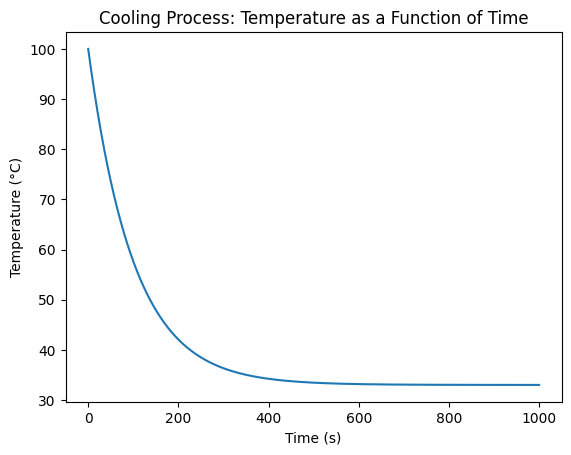

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the convection coefficient
beta = 1e-2  # in s^-1

# Define time differential and initial conditions
dt = 0.1  # in seconds
Tamb = 33  # Ambient temperature in °C

# Initialize arrays for temperature and time
nmax = 10000
T = np.zeros((nmax, 1))
t = np.zeros((nmax, 1))

# Set initial conditions
t[0] = 0  # Initial time at 0 seconds
T[0] = 100  # Initial body temperature in °C

# Simulation loop
for n in range(nmax-1):
    T[n+1] = T[n] + beta*(Tamb - T[n])*dt
    t[n+1] = t[n] + dt

# Plotting the temperature as a function of time
plt.plot(t, T)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title("Cooling Process: Temperature as a Function of Time")
plt.show()

## Results and Discussion

The above graph illustrates the body's temperature decrease over time as it gradually converges towards the ambient temperature. This behavior is consistent with Newton's Law of Cooling, which predicts that the rate of cooling is faster when the temperature difference is larger. As the body cools down, the rate of temperature change slows down, resulting in the gradual approach to thermal equilibrium.

With this understanding of Newton's Law of Cooling, we can now move on to a more complex model that involves heat conduction through a material over time.

---

# **One-Dimensional Heat Equation**

---

The **one-dimensional heat equation** characterizes the temporal and spatial evolution of temperature within a medium. It is a partial differential equation that models heat propagation through a material.

The discrete form of the one-dimensional heat equation is:

$$ T_{n+1,i} = T_{n,i} + r \cdot (T_{n,i+1} - 2T_{n,i} + T_{n,i-1}) $$

Where:
- $ T_{n,i} $ is the temperature at the spatial point \( i \) at time \( n \) (in °C or K).
- $ r $ is a parameter related to the thermal diffusivity $ \alpha $ and the temporal and spatial steps, defined as:

$$ r = \frac{\alpha \cdot \Delta t}{\Delta x^2} $$

- $ \alpha = \frac{\lambda}{\rho c} $ is the thermal diffusivity (in m²/s), where:
  - $ \lambda $ is the thermal conductivity of the material (in W/m·K).
  - $ \rho $ is the density of the material (in kg/m³).
  - $ c $ is the specific heat capacity of the material (in J/kg·K).

Next, we will implement the heat equation in Python to observe the temporal evolution of temperature within a material as heat propagates through it.

## Python Simulation

The following Python code solves the one-dimensional heat equation and creates a mesh plot of temperature distribution over time.

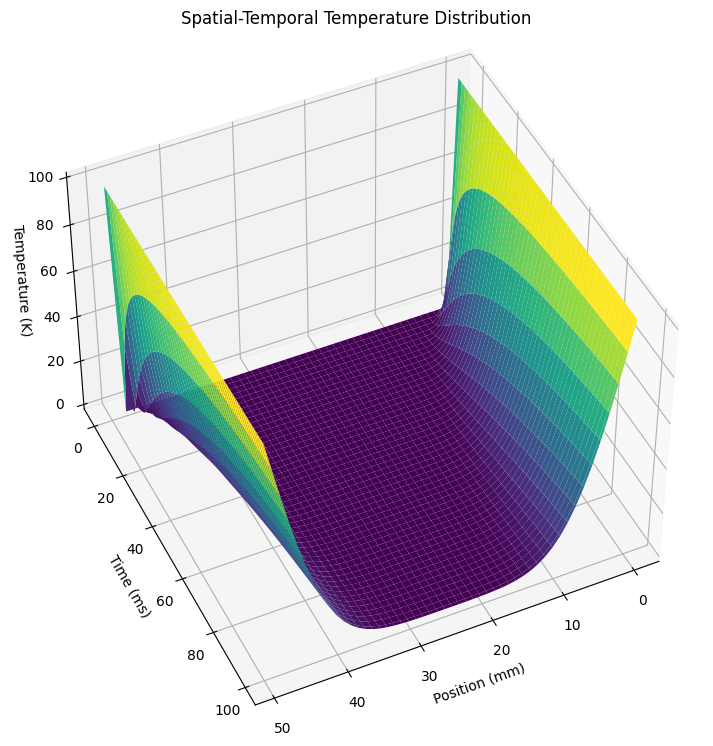

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameter r = dt * alpha / dx^2
r = 0.2
nmax = 100
imax = 50
T_reservoir = 100.0
T = np.zeros((nmax, imax))

# Boundary conditions
T[:, 0] = T_reservoir
T[:, imax-1] = T_reservoir

# Simulation
for n in range(0, nmax-1):
    for i in range(1, imax-1):
        T[n+1, i] = T[n, i] + r * (T[n, i+1] - 2 * T[n, i] + T[n, i-1])

# Creating the mesh for the plot
y = np.arange(0, T.shape[0])
x = np.arange(0, T.shape[1])
X, Y = np.meshgrid(x, y)
Z = T

# Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 65)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Position (mm)')
ax.set_ylabel('Time (ms)')
ax.set_zlabel('Temperature (K)')
ax.set_title('Spatial-Temporal Temperature Distribution')
plt.show()

## Results and Discussion

The 3D plot above illustrates how temperature evolves within the material over time, revealing how heat gradually spreads from the hotter regions (near the reservoir) to the cooler regions. This simulation visually demonstrates the principles of thermal conduction, where heat flows from high to low-temperature areas.

Finally, we will consolidate the key findings from these simulations and discuss their broader implications.

---

# **Activities**


---

To deepen your understanding of these concepts, you are encouraged to complete the following activities:

### **Activity 1: Newton's Law of Cooling (Total: 50 points)**
1. **Modify the provided code to include and present a temperature vs. time graph containing 3 curves with different convection coefficients (the ambient temperature will be the same for all three curves).** (20 points)
   - *Correct modification and implementation of the code for different convection coefficients.* (15 points)
   - *Clarity and accuracy of the resulting graph.* (5 points)

2. **Present another T vs. t graph with three curves where the convection coefficient is fixed, and the ambient temperature is changed.** (20 points)
   - *Correct modification and implementation of the code for different ambient temperatures.* (15 points)
   - *Clarity and accuracy of the resulting graph.* (5 points)

3. **Explain each result at the end, using comments for each graph.** (10 points)
   - *Clear and logical explanation of the results.* (5 points)
   - *Use of proper terminology and connection to the theoretical background.* (5 points)

### Initial Code

```python
iimport numpy as np
from matplotlib import pyplot as plt

# Convection coefficient --> Beta
# The Beta parameter determines the cooling rate

beta = 1e-2         # Beta value
dt = 0.1            # Time differential value
Tamb = 33           # Initial ambient temperature

nmax = 10000

T = np.zeros((nmax, 1))
t = np.zeros((nmax, 1))

t[0] = 0            # Initial time at 0 seconds
T[0] = 100          # Initial body temperature

for n in range(nmax-1):
    T[n+1] = T[n] + beta*(Tamb - T[n])*dt
    t[n+1] = t[n] + dt

# Plotting the temperature as a function of time
plt.plot(t, T)
plt.xlabel('Time (s)')
plt.ylabel('Temperature (ºC)')
plt.show()



### Modifications

- Part 1: Different Convection Coefficients

  Modify the code to include three curves with different convection coefficients ($β$) while keeping the ambient temperature constant.

- Part 2: Different Ambient Temperatures

  Modify the code to include three curves with the same convection coefficient ($β$) while changing the ambient temperature.

### Explanations

Add comments at the end of each graph explaining the observed results.

### Expected Result Part 1

![Expected Result 1.1](https://drive.google.com/uc?export=view&id=1lJbc-Lldmg98bvhrgLU187rq2OrTKhSz)

![Expected Result 1.2](https://drive.google.com/uc?export=view&id=169n9FKEhs2wO9DKp8yd2UVV7UxpSqUNE)


### **Activity 2: One-Dimensional Heat Equation (Total: 50 points)**
1. **Numerically solve the one-dimensional heat equation.** (15 points)
   - *Correct implementation of the numerical solution.* (10 points)
   - *Clarity and correctness of the code.* (5 points)

2. **Create a mesh plot for a body initially at 40°C immersed in an environment with a reservoir at 100°C at one end and 0°C at the other.** (25 points)
   - *Correct implementation of the boundary conditions and mesh plot generation.* (15 points)
   - *Clarity and accuracy of the resulting 3D plot.* (10 points)

3. **Present your work in a Google Colab notebook.** (10 points)
   - *Proper organization and documentation of the notebook.* (5 points)
   - *Clarity and readability of the notebook.* (5 points)

### Initial Code

```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameter r = dt * alpha / dx^2
r = 0.2
nmax = 100
imax = 50
T_reservoir = 100.0
T = np.zeros((nmax, imax))

# Boundary conditions
T[:, 0] = T_reservoir
T[:, imax-1] = T_reservoir

# Simulation
for n in range(0, nmax-1):
    for i in range(1, imax-1):
        T[n+1, i] = T[n, i] + r * (T[n, i+1] - 2 * T[n, i] + T[n, i-1])

# Creating the mesh for the plot
y = np.arange(0, T.shape[0])
x = np.arange(0, T.shape[1])
X, Y = np.meshgrid(x, y)
Z = T

# Plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 65)
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Position (mm)')
ax.set_ylabel('Time (ms)')
ax.set_zlabel('Temperature (K)')
ax.set_title('Spatial-Temporal Temperature Distribution')
plt.show()


### Explanations

Add comments to the plot explaining the observed results and how they relate to the theory of the one-dimensional heat equation.

### Expected Result Part 2

![Expected Result](https://drive.google.com/uc?export=view&id=1xkg1rTGJSQf9ib7CH7CLk8cZffGDJ6RN)

---

# **Limitations and Future Improvements**

---

While the simulations conducted for Newton's Law of Cooling and the One-Dimensional Heat Equation provide valuable insights into the fundamental principles of heat transfer, there are several limitations that should be acknowledged:

### Limitations
1. **Model Assumptions:** The simulations assume idealized conditions, such as homogeneous materials with constant properties (e.g., thermal conductivity, density) and perfect insulation from external influences. In reality, material properties can vary with temperature, and external factors like airflow or radiation may impact the results.

2. **Numerical Accuracy:** The accuracy of the numerical methods used, such as the discretization of time and space in the heat equation, depends on the chosen time step and grid resolution. Smaller time steps increase accuracy but at the cost of computational time and resources.

3. **Boundary Conditions:** The simulations use fixed boundary conditions (e.g., constant ambient temperature in Newton's Law of Cooling, fixed temperatures at the ends of the material in the heat equation). In practical applications, these conditions may vary over time or with environmental changes.

### Future Improvements
1. **Incorporation of Variable Material Properties:** Future work could explore how varying material properties with temperature affect the results, providing a more realistic simulation of heat transfer in complex materials.

2. **Advanced Boundary Conditions:** Implementing dynamic boundary conditions, such as varying ambient temperature or incorporating heat sources/sinks, could extend the applicability of these models to more complex real-world scenarios.

3. **Experimental Validation:** Although experimental data were not available for this project, future work could include laboratory experiments to validate and refine the models, ensuring that the simulations accurately reflect physical reality.

By recognizing these limitations and suggesting avenues for further development, we can better understand the scope and applicability of the simulations, making them more robust tools for practical engineering and scientific applications.


---

# **Practical Applications**

---

The simulations we conducted have direct applications in various fields:

1. **Engineering:** In the design of heating, ventilation, and air conditioning systems, understanding Newton's Law of Cooling allows engineers to optimize the efficiency of heating and cooling systems in buildings, ensuring comfort while minimizing energy consumption.

2. **Electronics:** The One-Dimensional Heat Equation is essential in the thermal management of electronic devices. Proper heat dissipation is crucial in preventing overheating, which can lead to reduced performance or failure of components.

3. **Materials Science:** Both concepts are fundamental in predicting how materials behave under thermal stress. For example, in metallurgy, controlling the cooling rate of metals can influence the microstructure and mechanical properties of the final product.

By linking these theoretical models to practical scenarios, we can see their value in solving real-world problems, making them indispensable tools in modern science and engineering.


---

# **Conclusions**

---

In this project, we explored two fundamental aspects of heat transfer: Newton's Law of Cooling and the One-Dimensional Heat Equation. Through numerical simulations in Python, we observed how these theoretical models predict the behavior of temperature in different scenarios.

**Newton's Law of Cooling** demonstrated how an object's temperature decreases over time, approaching the ambient temperature, with the rate of cooling depending on the difference between the object’s temperature and the environment.

**The One-Dimensional Heat Equation** provided insights into the diffusion of heat within a material, showing how temperature changes over space and time, particularly highlighting the gradual propagation of heat from higher to lower temperature regions.

These findings are significant as they provide a foundation for understanding and predicting thermal behavior in various practical applications, from climate control systems to electronic device cooling and materials engineering. By mastering these principles, one can design and optimize systems where precise temperature management is critical.

---

# **References**

---

1. Dutta, B.K. (2001). *Heat Transfer: Principles and Applications*. Prentice Hall.
2. Patankar, S.V. (1980). *Numerical Heat Transfer and Fluid Flow*. Hemisphere Publishing Corporation.
3. Bejan, A. (2013). *Convection Heat Transfer*. John Wiley & Sons.
4. Crank, J. (1975). *The Mathematics of Diffusion*. Oxford University Press.
5. Incropera, F.P., & DeWitt, D.P. (2007). *Fundamentals of Heat and Mass Transfer*. John Wiley & Sons.
6. Langtangen, H.P. (2016). *A Primer on Scientific Programming with Python*. Springer.
7. Oliphant, T.E. (2007). *Python for Scientific Computing*. *Computing in Science & Engineering*, 9(3), 10-20.
